# Human Lung Cell Atlas 1.0

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scanpy.external as sce
import sys
import os

import nested_clustering

In [2]:
dataset_name = "scanvi"
number_of_clust_levels = 3
use_rep = "X_scanvi_emb"
redo_pca = False

##### Source: https://beta.fastgenomics.org/webclient/api/datasets/dataset-427f1eee6dd44f50bae1ab13f0f3c6a9/files/datasetfileinfo-71e822e0a12642cf9ee5abdcc7086339/download/631f50f958154821ad4a766b132f8b4f

In [3]:
data = sc.read("./HLCA_v1.h5ad")

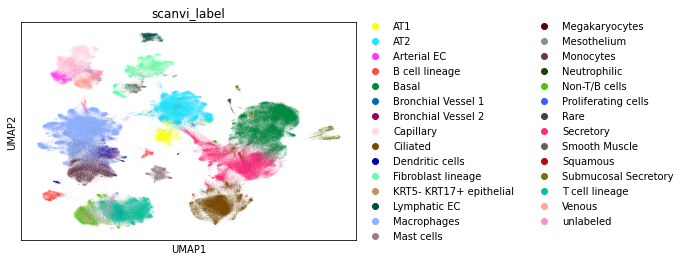

In [4]:
sc.pl.umap(
    data, 
    color="scanvi_label"
)

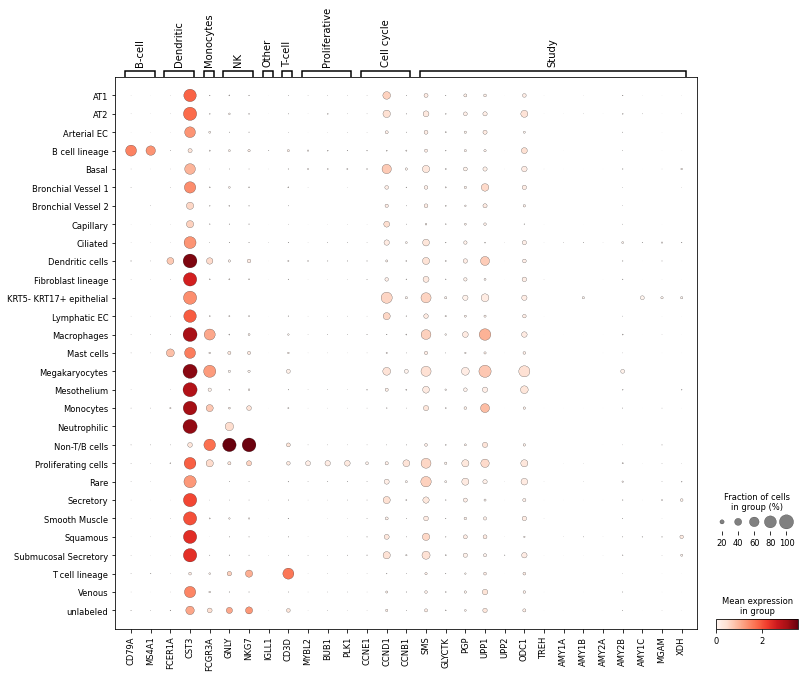

In [5]:
# 'CD79A', 'MS4A1' are B-cell markers

### https://www.nature.com/articles/nrc1802
# 'MYBL2', 'BUB1', 'PLK1' are proliferating cell markers
# 'CCNE1', 'CCND1' and 'CCNB1' cell cycle markers

"""
"SMS",
"GLYCTK",
"PGP",
"UPP1", "UPP2",
"UPP1", "UPP2",
"ODC1",
"TREH",
# "SI", <- not in dataset
"AMY1A", "AMY1B", "AMY2A", "AMY2B", "AMY1C",
"MGAM",
"XDH"
"""


marker_genes_dict = {
    'B-cell': ['CD79A', 'MS4A1'],
    'Dendritic': ['FCER1A', 'CST3'],
    'Monocytes': ['FCGR3A'],
    'NK': ['GNLY', 'NKG7'],
    'Other': ['IGLL1'],
    'T-cell': ['CD3D'],
    'Proliferative': ['MYBL2', 'BUB1', 'PLK1'],
    'Cell cycle': ['CCNE1', 'CCND1', 'CCNB1'],
    'Study': ['SMS', 'GLYCTK', 'PGP', "UPP1", "UPP2", "ODC1", "TREH", "AMY1A", "AMY1B", "AMY2A", "AMY2B", "AMY1C", "MGAM", "XDH"]
}

ax = sc.pl.dotplot(data, marker_genes_dict, groupby='scanvi_label')

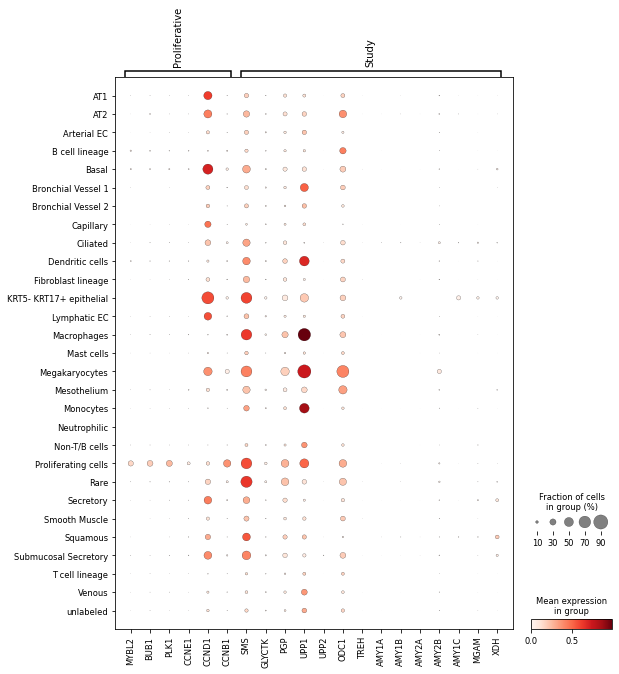

In [13]:
# 'CD79A', 'MS4A1' are B-cell markers

### https://www.nature.com/articles/nrc1802
# 'MYBL2', 'BUB1', 'PLK1' are proliferating cell markers
# 'CCNE1', 'CCND1' and 'CCNB1' cell cycle markers

"""
"SMS",
"GLYCTK",
"PGP",
"UPP1", "UPP2",
"UPP1", "UPP2",
"ODC1",
"TREH",
# "SI", <- not in dataset
"AMY1A", "AMY1B", "AMY2A", "AMY2B", "AMY1C",
"MGAM",
"XDH"
"""


marker_genes_dict = {
    'Proliferative': ['MYBL2', 'BUB1', 'PLK1', 'CCNE1', 'CCND1', 'CCNB1'],
    'Study': ['SMS', 'GLYCTK', 'PGP', "UPP1", "UPP2", "ODC1", "TREH", "AMY1A", "AMY1B", "AMY2A", "AMY2B", "AMY1C", "MGAM", "XDH"]
}

ax = sc.pl.dotplot(data, marker_genes_dict, groupby='scanvi_label', save='proliferation.svg')

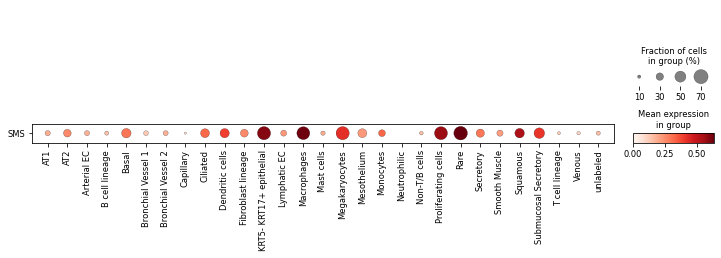

In [7]:
ax = sc.pl.dotplot(data, "SMS", groupby='scanvi_label', swap_axes=True)

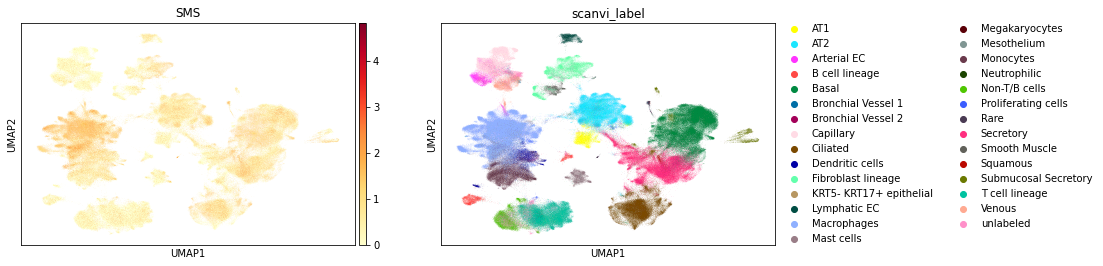

In [8]:
sc.pl.umap(data, color=['SMS', 'scanvi_label', ], color_map='YlOrRd')

In [9]:
data.uns["scanvi_label_colors"]

array(['#FFFF00', '#1CE6FF', '#FF34FF', '#FF4A46', '#008941', '#006FA6',
       '#A30059', '#FFDBE5', '#7A4900', '#0000A6', '#63FFAC', '#B79762',
       '#004D43', '#8FB0FF', '#997D87', '#5A0007', '#809693', '#6A3A4C',
       '#1B4400', '#4FC601', '#3B5DFF', '#4A3B53', '#FF2F80', '#61615A',
       '#BA0900', '#6B7900', '#00C2A0', '#FFAA92', '#FF90C9'],
      dtype=object)

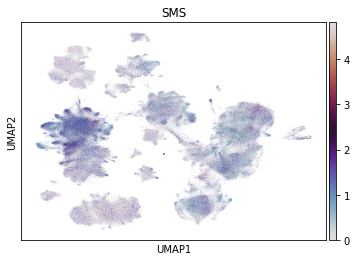

In [10]:
sc.pl.umap(data, color='SMS', color_map='twilight')

In [12]:
!conda list

# packages in environment at C:\Users\jorda\miniconda3:
#
# Name                    Version                   Build  Channel
_r-mutex                  1.0.0               anacondar_1  
anndata                   0.8.0                    pypi_0    pypi
argon2-cffi               21.3.0             pyhd3eb1b0_0  
argon2-cffi-bindings      21.2.0           py38h2bbff1b_0  
arviz                     0.11.2             pyhd3eb1b0_0  
asttokens                 2.0.5              pyhd3eb1b0_0  
attrs                     21.4.0             pyhd3eb1b0_0  
backcall                  0.2.0              pyhd3eb1b0_0  
bleach                    4.1.0              pyhd3eb1b0_0  
blosc                     1.21.0               h0e60522_0    conda-forge
brotli                    1.0.9                ha925a31_2  
brotlipy                  0.7.0           py38h2bbff1b_1003  
bzip2                     1.0.8                he774522_0  
ca-certificates           2021.10.8            h5b45459_0    conda-forge
c